In [1]:
import pandas as pd
import numpy as np
import os
import glob
import os
import subprocess
import pandas as pd
import numpy as np
from scipy.stats import iqr
from statsmodels.formula.api import ols
from scipy.stats import zscore
from nipype.interfaces.fsl import ImageMaths
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
# Create bar plot
plt.style.use('seaborn-v0_8-poster')
#plt.style.use('seaborn-v0_8')
fontsize = 11
plt.rcParams.update({
    "font.size": fontsize,          # Global font size
    "axes.labelsize": fontsize,     # X and Y axis labels
    "axes.titlesize": fontsize,     # Title (if used)
    "xtick.labelsize": fontsize,    # X-axis tick labels
    "ytick.labelsize": fontsize,    # Y-axis tick labels
    "legend.fontsize": fontsize,    # Legend font size
})

In [2]:
project_dir = '/Users/xiaoqianxiao/projects/OCD'
data_dir = os.path.join(project_dir, 'results/STV_group')
result_dir = os.path.join(project_dir, 'results/visualization')
if not os.path.exists(result_dir):
    os.makedirs(result_dir, exist_ok=True)

In [13]:
baseline_group_diff_file = os.path.join(data_dir, 'group_diff_baseline_tfce_corrp_tstat1.nii.gz')

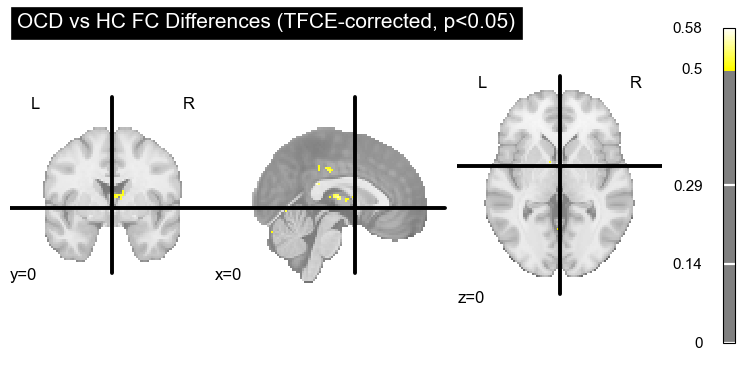

In [33]:
#1. Group Difference at Baseline
# OCD baseline 45
# HC baseline 23
from nilearn import plotting
plotting.plot_stat_map(
    baseline_group_diff_file,
    threshold=0.5,
    display_mode="ortho",
    cut_coords=(0, 0, 0),
    title="OCD vs HC FC Differences (TFCE-corrected, p<0.05)"
)
plotting.show()

In [21]:
fsl_cluster = "/Users/xiaoqianxiao/fsl/bin/fsl-cluster"

tfce_corrp_file = baseline_group_diff_file
output_file = os.path.join(result_dir, 'BaselineGroupDiff_methods-RandomiseWITHtfce_threshold-0.05.nii.gz')


# Step 1: Threshold and binarize
threshold = ImageMaths()
threshold.inputs.in_file = tfce_corrp_file
threshold.inputs.op_string = "-thr 1 -bin"
threshold.inputs.out_file = output_file
threshold.run()

# Step 2: Run cluster and save cluster-labeled output
cluster_output_file = output_file.replace('.nii.gz', '_clusters.nii.gz')
print(f"Cluster output: {cluster_output_file}")

cluster_cmd = [
    fsl_cluster,
    "--in=" + tfce_corrp_file,
    "--thresh=0.4",
    "--mm",
    "--oindex=" + cluster_output_file
]

try:
    result = subprocess.run(cluster_cmd, check=True, capture_output=True, text=True)
    print("Cluster summary:")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("Error running cluster command:")
    print(e.stderr)

Cluster output: /Users/xiaoqianxiao/projects/OCD/results/visualization/BaselineGroupDiff_methods-RandomiseWITHtfce_threshold-0.05_clusters.nii.gz
Cluster summary:
Cluster Index	Voxels	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)
13	5215	0.575	6	-26	30	-3.99	-47.2	10.2
12	45	0.448	-18	24	2	-15.1	22.8	4.86
11	43	0.451	18	-86	-26	15.6	-86.2	-25.4
10	9	0.423	24	-76	-28	24.2	-76.7	-26.9
9	6	0.411	20	-54	-26	19.3	-53.3	-25.7
8	5	0.414	24	-88	-38	24	-88	-38
7	4	0.416	-48	-54	-34	-48	-54	-33
6	4	0.414	0	38	8	1.5	39.5	8
5	3	0.411	14	24	4	13.3	24	3.33
4	2	0.406	26	-90	-30	25	-90	-30
3	1	0.402	12	-86	-34	12	-86	-34
2	1	0.412	-24	-56	-34	-24	-56	-34
1	1	0.406	16	22	10	16	22	10



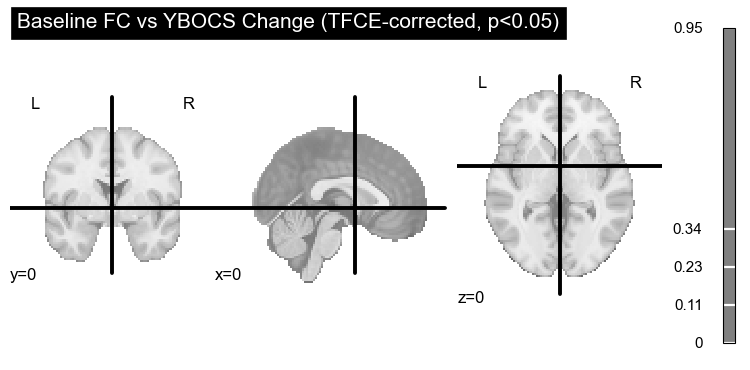

In [34]:
#2. Baseline FC vs. Symptom Change
# OCD 42
baseline_fc_vs_deltaYBOCS = os.path.join(data_dir, 'baselineFC_vs_deltaYBOCS_tfce_corrp_tstat1.nii.gz')
plotting.plot_stat_map(
    baseline_fc_vs_deltaYBOCS,
    threshold=0.95,
    display_mode="ortho",
    cut_coords=(0, 0, 0),
    title="Baseline FC vs YBOCS Change (TFCE-corrected, p<0.05)"
)
plotting.show()

In [32]:
fsl_cluster = "/Users/xiaoqianxiao/fsl/bin/fsl-cluster"

tfce_corrp_file = baseline_fc_vs_deltaYBOCS
output_file = os.path.join(result_dir, 'baselineFC_vs_deltaYBOCS_methods-RandomiseWITHtfce_threshold-0.05.nii.gz')


# Step 1: Threshold and binarize
threshold = ImageMaths()
threshold.inputs.in_file = tfce_corrp_file
threshold.inputs.op_string = "-thr 1 -bin"
threshold.inputs.out_file = output_file
threshold.run()

# Step 2: Run cluster and save cluster-labeled output
cluster_output_file = output_file.replace('.nii.gz', '_clusters.nii.gz')
print(f"Cluster output: {cluster_output_file}")

cluster_cmd = [
    fsl_cluster,
    "--in=" + tfce_corrp_file,
    "--thresh=0.2",
    "--mm",
    "--oindex=" + cluster_output_file
]

try:
    result = subprocess.run(cluster_cmd, check=True, capture_output=True, text=True)
    print("Cluster summary:")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("Error running cluster command:")
    print(e.stderr)

Cluster output: /Users/xiaoqianxiao/projects/OCD/results/visualization/baselineFC_vs_deltaYBOCS_methods-RandomiseWITHtfce_threshold-0.05_clusters.nii.gz
Cluster summary:
Cluster Index	Voxels	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)
1	1070	0.457	2	-62	40	-0.459	-56.1	38



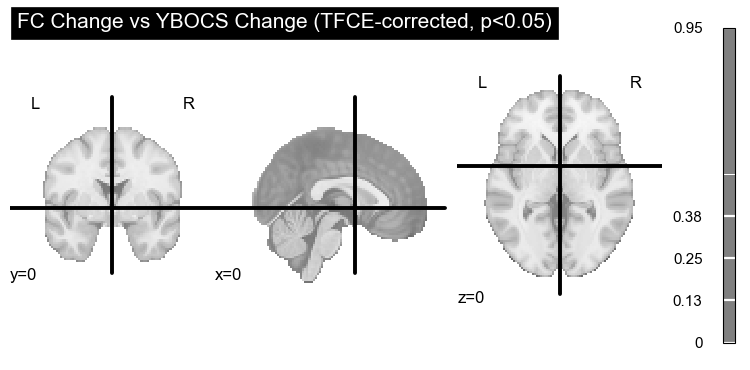

In [27]:
#3. FC Change vs. Symptom Change
deltaFC_vs_deltaYBOCS = os.path.join(data_dir, 'deltaFC_vs_deltaYBOCS_tfce_corrp_tstat1.nii.gz')
plotting.plot_stat_map(
    deltaFC_vs_deltaYBOCS,
    threshold=0.95,
    display_mode="ortho",
    cut_coords=(0, 0, 0),
    title="FC Change vs YBOCS Change (TFCE-corrected, p<0.05)"
)
plotting.show()

In [30]:
fsl_cluster = "/Users/xiaoqianxiao/fsl/bin/fsl-cluster"

tfce_corrp_file = deltaFC_vs_deltaYBOCS
output_file = os.path.join(result_dir, 'deltaFC_vs_deltaYBOCS_methods-RandomiseWITHtfce_threshold-0.05.nii.gz')


# Step 1: Threshold and binarize
threshold = ImageMaths()
threshold.inputs.in_file = tfce_corrp_file
threshold.inputs.op_string = "-thr 1 -bin"
threshold.inputs.out_file = output_file
threshold.run()

# Step 2: Run cluster and save cluster-labeled output
cluster_output_file = output_file.replace('.nii.gz', '_clusters.nii.gz')
print(f"Cluster output: {cluster_output_file}")

cluster_cmd = [
    fsl_cluster,
    "--in=" + tfce_corrp_file,
    "--thresh=0.5",
    "--mm",
    "--oindex=" + cluster_output_file
]

try:
    result = subprocess.run(cluster_cmd, check=True, capture_output=True, text=True)
    print("Cluster summary:")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("Error running cluster command:")
    print(e.stderr)

Cluster output: /Users/xiaoqianxiao/projects/OCD/results/visualization/deltaFC_vs_deltaYBOCS_methods-RandomiseWITHtfce_threshold-0.05_clusters.nii.gz
Cluster summary:
Cluster Index	Voxels	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)
1	1	0.507	2	-60	14	2	-60	14



In [3]:
NW_dir = '/Users/xiaoqianxiao/projects/OCD/results/NW_group'

In [4]:
group_diff_file = os.path.join(NW_dir, 'group_diff_baseline_roi_network_fc.csv')
df_group_diff = pd.read_csv(group_diff_file)
df_group_diff.sort_values(by='p_value', ascending=True).head(20)

,ROI,network1,network2,t_statistic,p_value,OCD_mean,HC_mean,OCD_n,HC_n,p_value_fdr
2904,ROI_208_Memory_retrieval,Salience,Memory_retrieval,-4.040818,0.000314,0.033111,0.176453,23,15,0.999499
1675,ROI_120_Sensory_Somatomotor_Mouth,Default_mode,Sensory_Somatomotor_Mouth,-3.211061,0.002790,0.034650,0.147483,23,15,0.999499
1133,ROI_81_Visual,Default_mode,Visual,-3.276347,0.003053,0.073660,0.149741,23,15,0.999499
2363,ROI_169_Uncertain,Visual,Uncertain,-3.184826,0.003361,0.075912,0.143667,23,15,0.999499
1816,ROI_130_Subcortical,Default_mode,Subcortical,3.150349,0.003382,0.056743,-0.019123,23,15,0.999499
2813,ROI_201_Visual,Fronto-parietal_Task_Control,Visual,-3.097485,0.003772,0.047098,0.126483,23,15,0.999499
2916,ROI_209_Dorsal_attention,Salience,Dorsal_attention,3.045131,0.004482,0.200049,0.112805,23,15,0.999499
3255,ROI_233_Salience,Subcortical,Salience,-3.019891,0.004842,0.099216,0.176240,23,15,0.999499
2061,ROI_148_Default_mode,Visual,Default_mode,-3.057430,0.004989,0.061699,0.132055,23,15,0.999499
1241,ROI_89_Sensory_Somatomotor_Mouth,Default_mode,Sensory_Somatomotor_Mouth,-2.981776,0.005200,0.029199,0.118479,23,15,0.999499


In [142]:
df_group_diff.loc[
    (df_group_diff['p_value'] <= 0.05)
]

,ROI,network1,network2,t_statistic,p_value,OCD_mean,HC_mean,OCD_n,HC_n,p_value_fdr
9,ROI_1_Sensory_Somatomotor_Mouth,Uncertain,Sensory_Somatomotor_Mouth,-2.377632,0.024454,0.131892,0.218516,23,15,0.999499
33,ROI_3_Fronto-parietal_Task_Control,Uncertain,Fronto-parietal_Task_Control,-2.049727,0.047955,0.137465,0.190824,23,15,0.999499
70,ROI_6_Auditory,Uncertain,Auditory,-2.703483,0.011004,0.031333,0.113687,23,15,0.999499
72,ROI_6_Cingulo-opercular_Task_Control,Uncertain,Cingulo-opercular_Task_Control,-2.274622,0.029797,-0.007704,0.066160,23,15,0.999499
75,ROI_6_Fronto-parietal_Task_Control,Uncertain,Fronto-parietal_Task_Control,-2.616134,0.012940,0.036522,0.091179,23,15,0.999499
...,...,...,...,...,...,...,...,...,...,...
3595,ROI_257_Uncertain,Dorsal_attention,Uncertain,-2.361688,0.026650,0.058334,0.111311,23,15,0.999499
3647,ROI_261_Salience,Dorsal_attention,Salience,2.382316,0.022698,0.193454,0.136489,23,15,0.999499
3655,ROI_262_Cerebellar,Dorsal_attention,Cerebellar,2.256855,0.032573,0.130780,0.041848,23,15,0.999499
3657,ROI_262_Default_mode,Dorsal_attention,Default_mode,-2.138672,0.040733,-0.012619,0.044088,23,15,0.999499


In [145]:
df_group_diff.loc[
    (df_group_diff['network1'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_group_diff['network2'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_group_diff['p_value'] <= 0.05)]

,ROI,network1,network2,t_statistic,p_value,OCD_mean,HC_mean,OCD_n,HC_n,p_value_fdr
1376,ROI_99_Dorsal_attention,Default_mode,Dorsal_attention,-2.721856,0.010367,-0.013609,0.098286,23,15,0.999499
3517,ROI_252_Default_mode,Dorsal_attention,Default_mode,-2.084385,0.045506,-0.060950,0.015717,23,15,0.999499
3587,ROI_257_Default_mode,Dorsal_attention,Default_mode,-2.339141,0.026912,-0.021033,0.053652,23,15,0.999499
3657,ROI_262_Default_mode,Dorsal_attention,Default_mode,-2.138672,0.040733,-0.012619,0.044088,23,15,0.999499
3658,ROI_262_Dorsal_attention,Dorsal_attention,Dorsal_attention,2.314812,0.028661,0.222336,0.138825,23,15,0.999499


In [132]:
baselineFC_vs_deltaYBOCS_file = os.path.join(NW_dir, 'baselineFC_vs_deltaYBOCS_roi_network_fc.csv')
df_baselineFC_vs_deltaYBOCS = pd.read_csv(baselineFC_vs_deltaYBOCS_file)
df_baselineFC_vs_deltaYBOCS.sort_values(by='p_value', ascending=True).head(20)

,ROI,network1,network2,slope,intercept,r_value,p_value,n,p_value_fdr
803,ROI_58_Fronto-parietal_Task_Control,Cingulo-opercular_Task_Control,Fronto-parietal_Task_Control,-41.895165,11.117939,-0.658717,0.001166,21,0.722974
1176,ROI_85_Auditory,Uncertain,Auditory,-33.104192,11.746240,-0.656826,0.001218,21,0.722974
3622,ROI_259_Subcortical,Dorsal_attention,Subcortical,-47.915673,13.163473,-0.654531,0.001285,21,0.722974
1634,ROI_117_Subcortical,Default_mode,Subcortical,-47.579320,11.627840,-0.649244,0.001449,21,0.722974
849,ROI_61_Sensory_Somatomotor_Mouth,Auditory,Sensory_Somatomotor_Mouth,-31.716074,14.280137,-0.647381,0.001511,21,0.722974
3457,ROI_247_Visual,Uncertain,Visual,-39.387243,12.141156,-0.635850,0.001948,21,0.722974
1835,ROI_132_Cerebellar,Uncertain,Cerebellar,-28.081164,11.392648,-0.635509,0.001962,21,0.722974
1126,ROI_81_Memory_retrieval,Default_mode,Memory_retrieval,-25.741378,10.727692,-0.634861,0.001990,21,0.722974
1844,ROI_132_Subcortical,Uncertain,Subcortical,-32.422150,11.509364,-0.629224,0.002243,21,0.722974
1750,ROI_126_Auditory,Default_mode,Auditory,-37.568085,11.251637,-0.628447,0.002280,21,0.722974


In [140]:
df_baselineFC_vs_deltaYBOCS.loc[
    (df_baselineFC_vs_deltaYBOCS['network1'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_baselineFC_vs_deltaYBOCS['network2'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_baselineFC_vs_deltaYBOCS['p_value'] <= 0.05)
]

,ROI,network1,network2,slope,intercept,r_value,p_value,n,p_value_fdr
1502,ROI_108_Dorsal_attention,Default_mode,Dorsal_attention,39.739951,8.582519,0.495557,0.022348,21,0.908499
1753,ROI_126_Default_mode,Default_mode,Default_mode,-39.312296,13.764009,-0.510373,0.018081,21,0.908499
3602,ROI_258_Dorsal_attention,Dorsal_attention,Dorsal_attention,-20.814556,14.842753,-0.459874,0.035948,21,0.908499
3616,ROI_259_Dorsal_attention,Dorsal_attention,Dorsal_attention,-30.338668,17.631534,-0.496813,0.021957,21,0.908499
3671,ROI_263_Default_mode,Dorsal_attention,Default_mode,-28.304869,10.430428,-0.449606,0.040868,21,0.908499


,ROI,network1,network2,slope,intercept,r_value,p_value,n,p_value_fdr
3671,ROI_263_Default_mode,Dorsal_attention,Default_mode,-28.304869,10.430428,-0.449606,0.040868,21,0.908499


In [133]:
deltaFC_vs_deltaYBOCS_file = os.path.join(NW_dir, 'deltaFC_vs_deltaYBOCS_roi_network_fc.csv')
df_deltaFC_vs_deltaYBOCS = pd.read_csv(deltaFC_vs_deltaYBOCS_file)
df_deltaFC_vs_deltaYBOCS.sort_values(by='p_value', ascending=True).head(20)

,ROI,network1,network2,slope,intercept,r_value,p_value,n,p_value_fdr
2903,ROI_208_Fronto-parietal_Task_Control,Salience,Fronto-parietal_Task_Control,36.764034,11.130872,0.931758,0.000087,10,0.184156
2611,ROI_187_Salience,Fronto-parietal_Task_Control,Salience,46.554499,11.017345,0.929418,0.000100,10,0.184156
2917,ROI_209_Fronto-parietal_Task_Control,Salience,Fronto-parietal_Task_Control,35.982292,11.739032,0.914538,0.000210,10,0.259081
2597,ROI_186_Salience,Fronto-parietal_Task_Control,Salience,49.035740,9.384091,0.879817,0.000788,10,0.530480
2687,ROI_192_Visual,Fronto-parietal_Task_Control,Visual,43.778228,11.402407,0.877028,0.000860,10,0.530480
777,ROI_56_Salience,Cingulo-opercular_Task_Control,Salience,55.918875,7.570078,0.872666,0.000984,10,0.530480
3015,ROI_216_Fronto-parietal_Task_Control,Salience,Fronto-parietal_Task_Control,74.646308,11.483680,0.866674,0.001173,10,0.530480
3381,ROI_242_Salience,Ventral_attention,Salience,36.924282,9.354765,0.860615,0.001391,10,0.530480
2466,ROI_177_Cingulo-opercular_Task_Control,Fronto-parietal_Task_Control,Cingulo-opercular_Task_Control,36.679502,11.588405,0.859920,0.001418,10,0.530480
2681,ROI_192_Salience,Fronto-parietal_Task_Control,Salience,48.189599,10.308871,0.856253,0.001565,10,0.530480


In [141]:
df_deltaFC_vs_deltaYBOCS.loc[
    (df_deltaFC_vs_deltaYBOCS['network1'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_deltaFC_vs_deltaYBOCS['network2'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_deltaFC_vs_deltaYBOCS['p_value'] <= 0.05)
]

,ROI,network1,network2,slope,intercept,r_value,p_value,n,p_value_fdr
1193,ROI_86_Default_mode,Default_mode,Default_mode,45.403180,11.433913,0.634829,0.048623,10,0.995849
1291,ROI_93_Default_mode,Default_mode,Default_mode,50.215558,13.388308,0.654200,0.040154,10,0.983491
1292,ROI_93_Dorsal_attention,Default_mode,Dorsal_attention,-34.743893,10.087716,-0.666269,0.035414,10,0.972212
1319,ROI_95_Default_mode,Default_mode,Default_mode,57.691383,12.305321,0.683625,0.029285,10,0.972212
1333,ROI_96_Default_mode,Default_mode,Default_mode,47.869996,9.046572,0.694275,0.025907,10,0.972212
1572,ROI_113_Dorsal_attention,Default_mode,Dorsal_attention,112.100635,7.619169,0.782204,0.007498,10,0.877690
1711,ROI_123_Default_mode,Default_mode,Default_mode,26.598779,10.547785,0.644083,0.044441,10,0.995849
